In [2]:
# import section
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from ipywidgets import *

In [3]:
# temp
import warnings
warnings.filterwarnings('ignore')

In [4]:
sns.__version__

'0.8.1'

## TO DO LIST

* controle of de warnings uit kunnen als seaborn 0.9.0 voor Conda beschikbaar is
* folium! + widgets
* folium wachttijden
* folium selecteer specialisme en toon map
* folium slecteer 3 specialismen en toon 3 boxplots in seaborn!



### Simple plot

$f(x) = x^2$

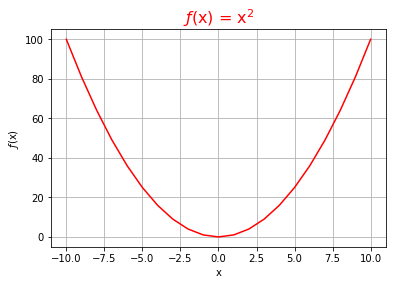

In [5]:
x = np.array(np.arange(-10, 11))
y = x ** 2
plt.plot(x, y, color='r', linewidth=1.5)
plt.title(r'$ƒ$(x) = x$^2$', fontsize=16, color='r') # LaTeX function in title!
plt.xlabel('x')
plt.ylabel(r'$ƒ$(x)')
plt.grid(True)
plt.show()

### Jupyter Widgets

For a complete list see: [https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [6]:
widgets.IntSlider(value=4, min=0, max=10, step=2, description='Demo')

IntSlider(value=4, description='Demo', max=10, step=2)

In [7]:
widgets.IntRangeSlider(value=[3, 7], min=0, max=10, step=1, description='Demo',)

IntRangeSlider(value=(3, 7), description='Demo', max=10)

In [8]:
widgets.RadioButtons(options=['A', 'B', 'C'], value='B', description='Demo')

RadioButtons(description='Demo', index=1, options=('A', 'B', 'C'), value='B')

In [9]:
widgets.Dropdown(options=[char for char in 'ABCDE'], value='B', description='Demo')

Dropdown(description='Demo', index=1, options=('A', 'B', 'C', 'D', 'E'), value='B')

In [10]:
widgets.Select(options=[char for char in 'ABCDEFGHIJKLMNOPQRSTUVW'],
               value='D',
               rows=3,
               description='Demo')

Select(description='Demo', index=3, options=('A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', …

In [11]:
widgets.ToggleButtons(options=['A', 'B', 'C'],
                      description='Demo',
                      value='B',
                      tooltips=['Omschrijving A', 'Omschrijving B', 'Omschrijving C']
)

ToggleButtons(description='Demo', index=1, options=('A', 'B', 'C'), tooltips=('Omschrijving A', 'Omschrijving …

### Interactive plot!

In [12]:
def graph(macht):
    x = np.linspace(-20, 21, 200)
    y = x**macht
    plt.plot(x, y, color='b', linewidth=1.5)
    plt.title(r'$ƒ$(x) = x$^{}$'.format(macht), fontsize=16, color='b') # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$ƒ$(x)')
    plt.grid(True)
    return plt.show()

interact(graph,
         macht = widgets.IntSlider(value=2, min=1, max=7, description='Macht'))

interactive(children=(IntSlider(value=2, description='Macht', max=7, min=1), Output()), _dom_classes=('widget-…

<function __main__.graph(macht)>

### Multiple widgets

In [17]:
def graph(macht, xrange, font, lijn, kleur, raster):
    x = np.linspace(xrange[0], xrange[1]+1, 100)
    y = x**macht
    plt.plot(x, y, color=kleur, linewidth=lijn)
    plt.title(r'$ƒ$(x) = x$^{}$'.format(macht), fontsize=font, color=kleur) # LaTeX function in title!
    plt.xlabel('x')
    plt.ylabel(r'$ƒ$(x)')
    plt.grid(raster)
    return plt.show()

interact(graph,
         macht = widgets.IntSlider(value=2, min=0, max=7, description='Macht'),
         xrange = widgets.IntRangeSlider(value=[-20, 20], min=-50, max=50, step=5, description='x'),
         font = widgets.IntSlider(value=10, min=20, max=30, description='Font'),
         lijn = widgets.FloatSlider(value=5, min=0, max=7.5, step=0.5, description='Lijn', readout_format='.1f'),
         kleur = widgets.RadioButtons(options=['red', 'green', 'blue', 'purple', 'orange'], value='purple', description='Kleur'),
         raster = widgets.Checkbox(value=True, description='Raster', disabled=False)
        )

interactive(children=(IntSlider(value=2, description='Macht', max=7), IntRangeSlider(value=(-20, 20), descript…

<function __main__.graph(macht, xrange, font, lijn, kleur, raster)>

### Filter Data

In [43]:
iris = sns.load_dataset('iris')

def iris_filter(length, width):
    selection = iris[(iris.sepal_length >= length[0]) &
                     (iris.petal_length >= length[0]) &
                     (iris.sepal_length <= length[1]) &
                     (iris.petal_length <= length[1]) &
                     (iris.sepal_width >= width[0]) &
                     (iris.petal_width >= width[0]) &
                     (iris.sepal_width <= width[1]) &
                     (iris.petal_width <= width[1])]
    print('Aantal rijen in selectie: {}'.format(selection.shape[0]))
    return selection

interact(iris_filter,
         length = widgets.FloatRangeSlider(value=[min([iris.sepal_length.min(),
                                                       iris.petal_length.min()]) + 2,
                                                  max([iris.sepal_length.max(),
                                                       iris.petal_length.max()]) - 2],
                                           min=min([iris.sepal_length.min(),
                                                    iris.petal_length.min()]),
                                           max=max([iris.sepal_length.max(),
                                                    iris.petal_length.max()]),
                                           step=0.1, readout_format='.1f'),
         width = widgets.FloatRangeSlider(value=[min([iris.sepal_width.min(),
                                                      iris.petal_width.min()]) + 1.5,
                                                 max([iris.sepal_width.max(),
                                                      iris.petal_width.max()]) - 1.5],
                                          min=min([iris.sepal_width.min(),
                                                   iris.petal_width.min()]),
                                          max=max([iris.sepal_width.max(),
                                                   iris.petal_width.max()]),
                                          step=0.1,readout_format='.1f'))

interactive(children=(FloatRangeSlider(value=(3.0, 5.9), description='length', max=7.9, min=1.0, readout_forma…

<function __main__.iris_filter(length, width)>

### Visualize Data (with seaborn)

For nice seaborn plot examples, have a look at the [Example gallery](https://seaborn.pydata.org/examples).

In [176]:
sns.set(style='white')
iris = sns.load_dataset('iris')

def graph(x, y, species, type):
    sns.jointplot(x=x, y=y, data=iris[iris.species == species], kind=type)
    return plt.show()

interact(graph,
         type = widgets.ToggleButtons(options=['kde', 'reg', 'scatter', 'resid', 'hex'], description='Type'),
         species = widgets.RadioButtons(options=iris.species.unique(), description='Species', value='virginica'),
         x = widgets.Dropdown(options=iris.columns[:-1], description='X-axis', value='petal_length'),
         y = widgets.Dropdown(options=iris.columns[:-1], description='Y-axis', value='petal_width')
        )

interactive(children=(Dropdown(description='X-axis', index=2, options=('sepal_length', 'sepal_width', 'petal_l…

<function __main__.graph(x, y, species, type)>

## Unsupervised learning: _k_-Means (with centroids)

In [177]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
data = iris.data[:,:2]

def kmeans(k):
    model = KMeans(n_clusters=k) # Create a KMeans instance with 3 clusters: model
    model.fit(data) # Fit model to points
    labels = model.predict(data)
    plt.scatter(x=data[:,0], y=data[:,1], c=labels, alpha=0.7, cmap='tab10')#Accent
    plt.scatter(x= model.cluster_centers_[:,0], y=model.cluster_centers_[:,1], marker='D', s=125, c='red')
    plt.title(r'$k$-Means ($k$ = {})'.format(k), fontsize=18, color='red')
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    return plt.show()

interact(kmeans, k = widgets.IntSlider(value=5, min=1, max=10, description='k'))

interactive(children=(IntSlider(value=5, description='k', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.kmeans(k)>

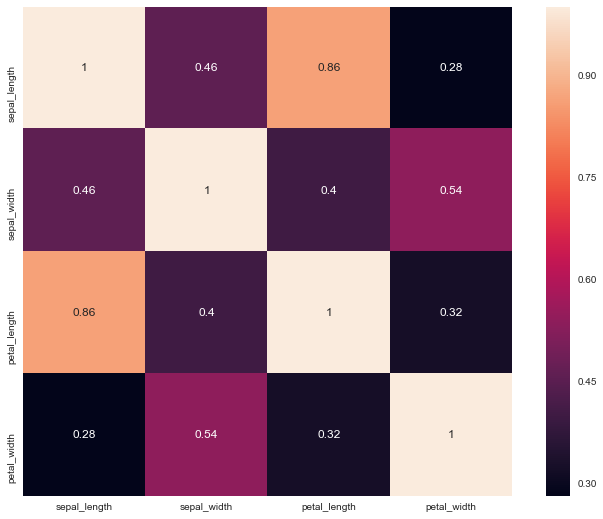

In [264]:
iris = sns.load_dataset('iris')
sns.set(style='white', palette='muted', color_codes=True)

corrmat = iris[100:].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True, annot=True);

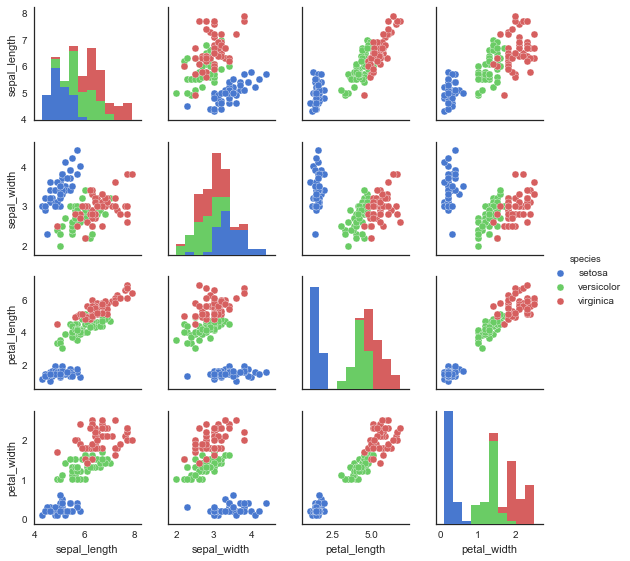

In [277]:
sns.pairplot(iris, size = 2.0,hue ='species')
plt.show()

In [223]:
import pandas as pd
import matplotlib.pyplot as ply
import seaborn as sns
iris = sns.load_dataset('iris')
iris_petal = pd.DataFrame(iris.iloc[:,-3:].values, columns=['length', 'width', 'species'])
iris_petal['type'] = 'petal'
iris_sepal = pd.DataFrame(iris.iloc[:,[0, 1, -1]].values, columns=['length', 'width', 'species'])
iris_sepal['type'] = 'sepal'
iris = pd.concat([iris_sepal, iris_petal])
iris.length = iris.length.astype('float', copy=False)
iris.width = iris.width.astype('float', copy=False)
iris.sample(n=10)

,length,width,species,type
56,6.3,3.3,versicolor,sepal
77,6.7,3.0,versicolor,sepal
8,4.4,2.9,setosa,sepal
129,5.8,1.6,virginica,petal
71,6.1,2.8,versicolor,sepal
33,5.5,4.2,setosa,sepal
4,5.0,3.6,setosa,sepal
7,1.5,0.2,setosa,petal
148,5.4,2.3,virginica,petal
91,4.6,1.4,versicolor,petal


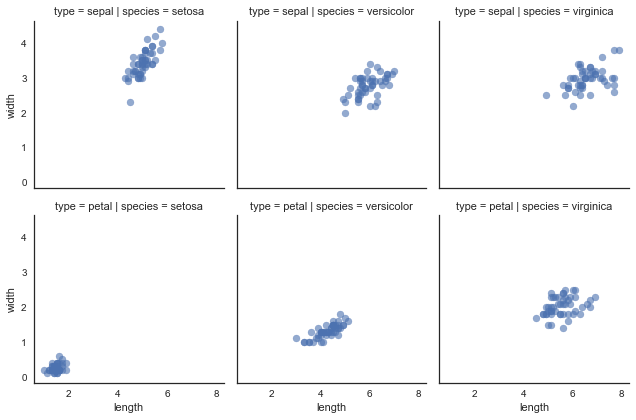

In [226]:
g = sns.FacetGrid(iris, col="species",  row="type")
g = g.map(plt.scatter, "length", "width", alpha=0.6)

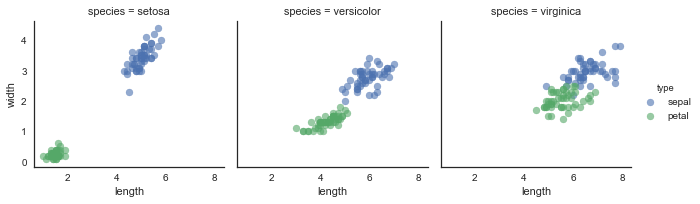

In [227]:
g = sns.FacetGrid(iris, col="species", hue="type")
g = (g.map(plt.scatter, "length", "width", alpha=0.6).add_legend())

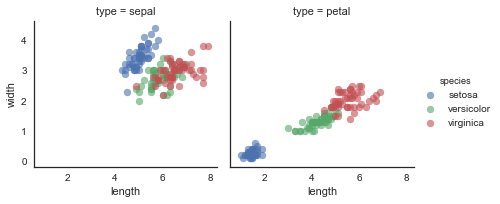

In [228]:
g = sns.FacetGrid(iris, col="type",  hue="species")
g = (g.map(plt.scatter, "length", "width", alpha=0.6).add_legend())

### Opdracht wachttijden!

In [17]:
WACHTTIJDEN PER PROVINCIE of per gemeente?

Object `gemeente` not found.


In [ ]:
WACHTTIJDEN PER PROVINCIE of per gemeente

In [18]:
WACHTTIJDEN PER PROVINCIE of per gemeente

SyntaxError: invalid syntax (<ipython-input-18-3dc45705ba8a>, line 1)

In [ ]:
CLUSTERING UNSUPERVISED! MET IRIS!

[http://jupyter.org/widgets#jupyter-gmaps](http://jupyter.org/widgets#jupyter-gmaps)

In [19]:
from ipyleaflet import Map

Map(center=[34.6252978589571, -77.34580993652344], zoom=10)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [18]:
conda install -c conda-forge ipyleaflet

SyntaxError: invalid syntax (<ipython-input-18-230478de0b6d>, line 1)

In [32]:
from  ipyleaflet import Map, Marker, Circle, CircleMarker, LayerGroup, basemaps

m = Map(center=[51.700659, 5.327835], zoom=10)
marker = Marker(location=(51.7, 5.33))
group = LayerGroup(layers=(marker,))
m.add_layer(group)



In [33]:
m

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [25]:
ipyleaflet.Marker([51.700659, 5.327835]).add_to(m)

TypeError: __init__() takes 1 positional argument but 2 were given

In [ ]:
m

[https://github.com/jupyter-widgets/ipyleaflet/tree/master/examples](https://github.com/jupyter-widgets/ipyleaflet/tree/master/examples)

In [26]:
help(ipyleaflet.Marker)

Help on class Marker in module ipyleaflet.leaflet:

class Marker(UILayer)
 |  A parent class for HasTraits that log.
 |  Subclasses have a log trait, and the default behavior
 |  is to get the logger from the currently running Application.
 |  
 |  Method resolution order:
 |      Marker
 |      UILayer
 |      Layer
 |      ipywidgets.widgets.widget.Widget
 |      ipywidgets.widgets.widget.LoggingHasTraits
 |      traitlets.traitlets.HasTraits
 |      traitlets.traitlets.HasDescriptors
 |      InteractMixin
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, **kwargs)
 |      Public constructor
 |  
 |  on_move(self, callback, remove=False)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  alt
 |      A trait for unicode strings.
 |  
 |  draggable
 |      A boolean (True, False) trait.
 |  
 |  keyboard
 |      A boolean (True, False) trait.
 |  
 |  location
 |      An instance of a 

In [186]:
from ipyleaflet import *

In [188]:
m = Map(center=(52.089, 5.115), zoom=8, basemap=basemaps.Hydda.Full)

In [194]:
marker = Marker(location=(52.089, 5.115))

popup = Popup(
    location=(52.089, 5.115),
    child='message1',
    close_button=False,
    auto_close=False,
    close_on_escape_key=False
)

group = LayerGroup(layers=(marker,))
m.add_layer(group)

TraitError: The 'child' trait of a Popup instance must be a DOMWidget or None, but a value of class 'str' (i.e. 'test') was specified.

In [191]:
m

Map(basemap={'url': 'http://{s}.tile.openstreetmap.se/hydda/full/{z}/{x}/{y}.png', 'max_zoom': 18, 'attributio…

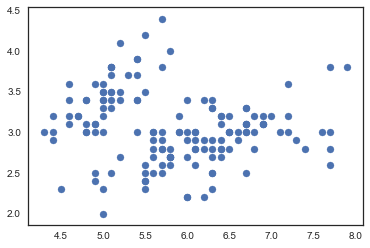

In [307]:
# basic plot
plt.scatter(x = iris.sepal_length, y = iris.sepal_width)
plt.show()

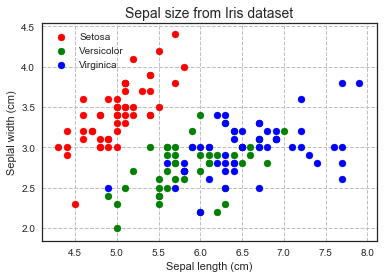

In [328]:
# colors
fig = plt.figure()
ax = fig.add_subplot(111)

species_1 = ax.scatter(x = iris[:50].sepal_length, y = iris[:50].sepal_width,  c='red')
species_2 = ax.scatter(x = iris[50:100].sepal_length, y = iris[50:100].sepal_width,  c='green')
species_3 = ax.scatter(x = iris[100:].sepal_length, y = iris[100:].sepal_width,  c='blue')

ax.legend([species_1, species_2, species_3], ['Setosa', 'Versicolor', 'Virginica'], loc=2)

ax.set_title('Sepal size from Iris dataset', fontsize=14)

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Seplal width (cm)')

ax.grid(True, linestyle='--', color='0.75')

plt.show()

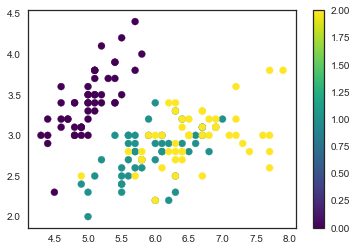

In [342]:
# colormaps
from sklearn.datasets import load_iris
iris = load_iris()
plt.scatter(x=iris.data[:,0], y=iris.data[:,1], c=iris.target, cmap='viridis')
plt.colorbar()
plt.show()

In [113]:
sns.get_dataset_names()

['anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'iris',
 'mpg',
 'planets',
 'tips',
 'titanic']

In [154]:
mpg = sns.load_dataset('mpg')
mpg.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,usa,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,usa,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,usa,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,usa,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,usa,amc ambassador dpl


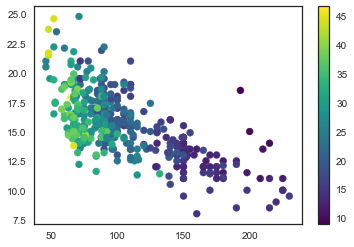

In [155]:
mpg = sns.load_dataset('mpg')
plt.scatter(x=mpg.horsepower, y=mpg.acceleration, c=mpg.mpg, cmap='viridis')
plt.colorbar()
plt.show()

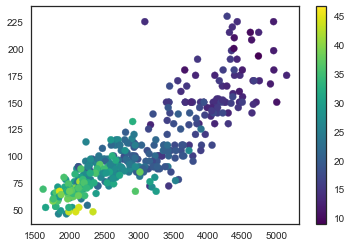

In [163]:
mpg = sns.load_dataset('mpg')
plt.scatter(x=mpg.weight, y=mpg.horsepower, c=mpg.mpg, cmap='viridis')
plt.colorbar()
plt.draw()
plt.savefig("output.svg")
plt.show()

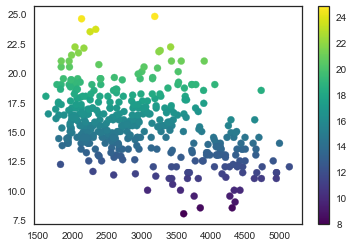

In [184]:
mpg = sns.load_dataset('mpg')
plt.scatter(x=mpg.weight, y=mpg.acceleration, c=mpg.acceleration, cmap='viridis')
plt.colorbar()
plt.show()

In [ ]:
sns.kdeplot(x=
           );

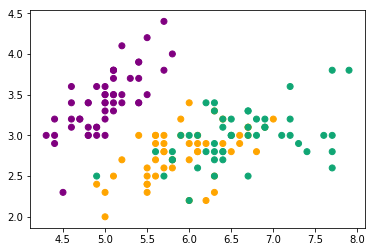

In [193]:
# colors
colors = {'setosa': 'purple', 'versicolor': 'orange', 'virginica': '#10a674'} # color namens and html-colors
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=[colors[i] for i in iris.species])
plt.show()

In [ ]:
axarr[0].set_title('setosa')
axarr[0].scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

axarr[1].set_title('versicolor')
axarr[1].scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

axarr[2].set_title('virginica')
axarr[2].scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

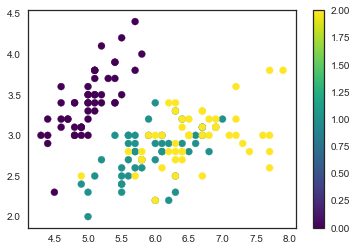

In [34]:
from sklearn.datasets import load_iris
iris = load_iris()
plt.scatter(x=iris.data[:,0], y=iris.data[:,1], c=iris.target, cmap='viridis')
plt.colorbar()
plt.show()

See [https://matplotlib.org/api/colors_api.html](https://matplotlib.org/api/colors_api.html) and [https://xkcd.com/color/rgb/](https://xkcd.com/color/rgb)

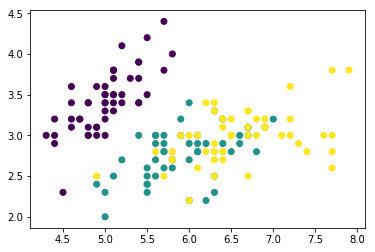

In [245]:
# colormaps
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plt.scatter(x=iris.sepal_length, y=iris.sepal_width, c=[colors[i] for i in iris.species], cmap='viridis')
plt.show()

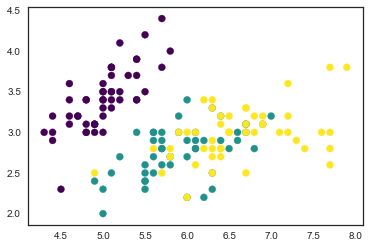

In [293]:
plt.scatter(x=iris.data[:,0], y=iris.data[:,1], c=iris.target, cmap='viridis')

In [250]:
len(iris.data[:,[0]])

150

[Colormaps Reference]( https://matplotlib.org/examples/color/colormaps_reference.html)

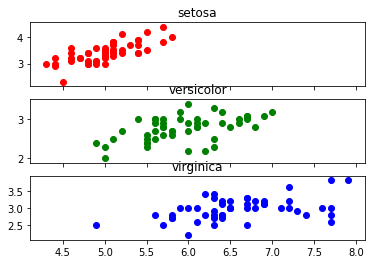

In [189]:
# Shared x-axis
f, axarr = plt.subplots(3, sharex=True)

axarr[0].set_title('setosa')
axarr[0].scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

axarr[1].set_title('versicolor')
axarr[1].scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

axarr[2].set_title('virginica')
axarr[2].scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

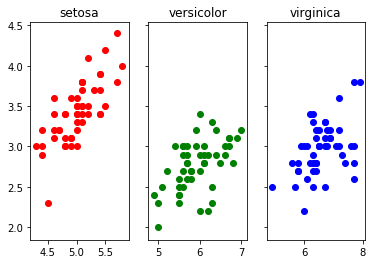

In [192]:
# shared y-axis
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)

ax1.set_title('setosa')
ax1.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

ax2.set_title('versicolor')
ax2.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

ax3.set_title('virginica')
ax3.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

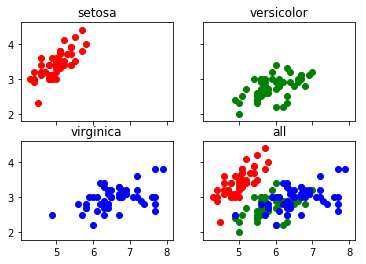

In [188]:
# shared y-axis
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.set_title('setosa')
ax1.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa

ax2.set_title('versicolor')
ax2.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor

ax3.set_title('virginica')
ax3.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

ax4.set_title('all')
ax4.scatter(iris[:50].sepal_length, iris[:50].sepal_width, color='red') # setosa
ax4.scatter(iris[50:100].sepal_length, iris[50:100].sepal_width, color='green') # versicolor
ax4.scatter(iris[100:].sepal_length, iris[100:].sepal_width, color='blue') # virginica

plt.show()

### Seaborn

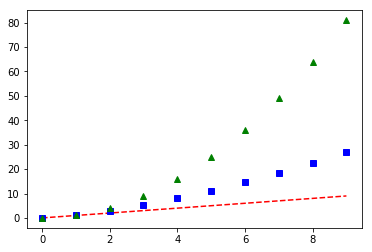

In [16]:
# red dashes, blue squares and green triangles
x = np.array(np.arange(10))
plt.plot(x, x, 'r--', x, x**1.5, 'bs', x, x**2, 'g^')
plt.show()

In [ ]:
https://matplotlib.org/users/pyplot_tutorial.html

In [ ]:
https://stackoverflow.com/questions/45862223/use-different-colors-in-scatterplot-for-iris-dataset

In [ ]:
https://gist.github.com/jobliz/2903500

In [ ]:
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_with_legend.html

In [ ]:
https://matplotlib.org/gallery/subplots_axes_and_figures/subplot.html#sphx-glr-gallery-subplots-axes-and-figures-subplot-py

In [ ]:
https://matplotlib.org/gallery/statistics/boxplot_vs_violin.html#sphx-glr-gallery-statistics-boxplot-vs-violin-py

In [ ]:
# scatter histogram
https://matplotlib.org/gallery/lines_bars_and_markers/scatter_hist.html#sphx-glr-gallery-lines-bars-and-markers-scatter-hist-py

In [29]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

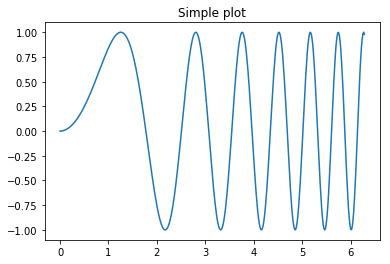

In [30]:
plt.plot(x, y)
plt.title('Simple plot')
plt.show()

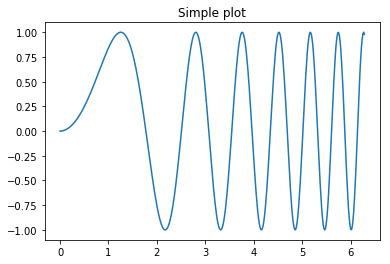

In [31]:
# Just a figure and one subplot
np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

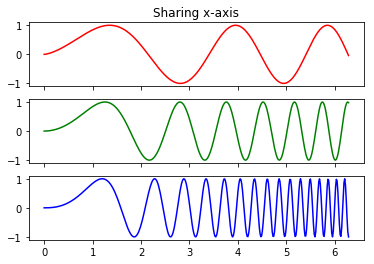

In [77]:
# Three subplots, the axes array is 1-d
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
f, axarr = plt.subplots(3, sharex=True)
axarr[0].set_title('Sharing x-axis')
axarr[0].plot(x, np.sin(x ** 1.5), 'r')
axarr[1].plot(x, np.sin(x ** 2.0), c='g')
axarr[2].plot(x, np.sin(x ** 2.5), c='b')
plt.show()

Text(0.5,1,'Easy as 1, 2, 3')

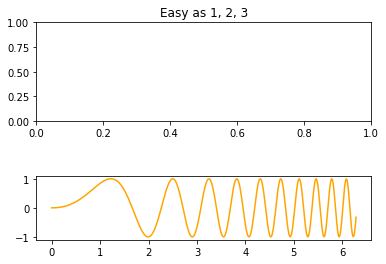

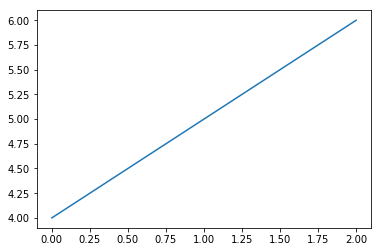

In [90]:
x = np.linspace(0, 2 * np.pi, 400)

plt.figure(1)                # the first figure

plt.subplot(311)             # the first subplot in the first figure
plt.plot(x, np.sin(x ** 1.5))

plt.subplot(312)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 1.75), color='green')

plt.subplot(312)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 2.0), color='red')

plt.subplot(313)             # the second subplot in the first figure
plt.plot(x, np.sin(x ** 2.25), color='orange')


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot(111) by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title

In [72]:
np.arange(-25, 26)

array([-25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13,
       -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,
         1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25])

In [91]:
# Simple data to display in various forms
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

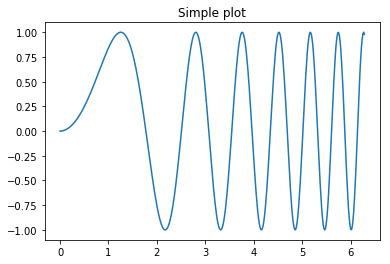

In [92]:
# Just a figure and one subplot
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title('Simple plot')
plt.show()

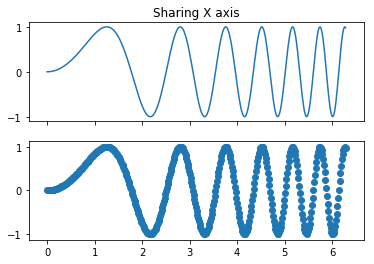

In [93]:
# Two subplots, the axes array is 1-d
f, axarr = plt.subplots(2, sharex=True)
axarr[0].plot(x, y)
axarr[0].set_title('Sharing X axis')
axarr[1].scatter(x, y)
plt.show()

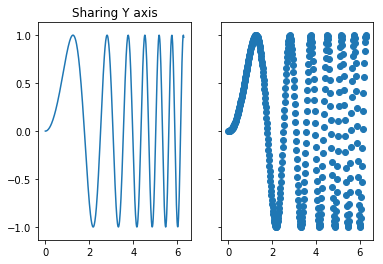

In [94]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)
plt.show()

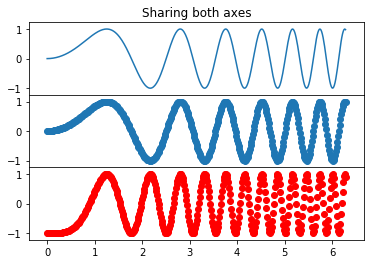

In [95]:
# Three subplots sharing both x/y axes
f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing both axes')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
f.subplots_adjust(hspace=0)
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)
plt.show()

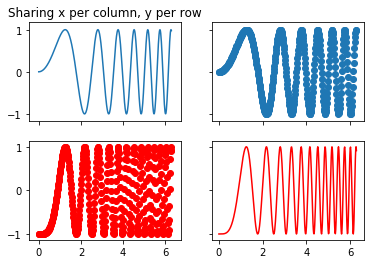

In [96]:
# row and column sharing
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
ax1.plot(x, y)
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(x, y)
ax3.scatter(x, 2 * y ** 2 - 1, color='r')
ax4.plot(x, 2 * y ** 2 - 1, color='r')
plt.show()

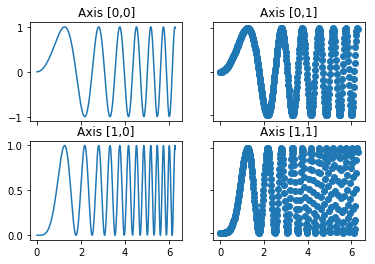

In [97]:
# Four axes, returned as a 2-d array
f, axarr = plt.subplots(2, 2)
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; hide x ticks for top plots and y ticks for right plots
plt.setp([a.get_xticklabels() for a in axarr[0, :]], visible=False)
plt.setp([a.get_yticklabels() for a in axarr[:, 1]], visible=False)
plt.show()

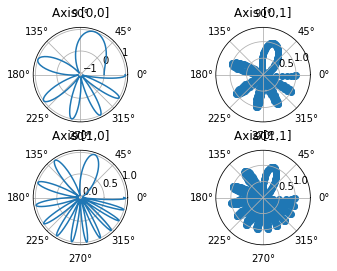

In [98]:
# Four polar axes
f, axarr = plt.subplots(2, 2, subplot_kw=dict(projection='polar'))
axarr[0, 0].plot(x, y)
axarr[0, 0].set_title('Axis [0,0]')
axarr[0, 1].scatter(x, y)
axarr[0, 1].set_title('Axis [0,1]')
axarr[1, 0].plot(x, y ** 2)
axarr[1, 0].set_title('Axis [1,0]')
axarr[1, 1].scatter(x, y ** 2)
axarr[1, 1].set_title('Axis [1,1]')
# Fine-tune figure; make subplots farther from each other.
f.subplots_adjust(hspace=0.3)
plt.show()

In [99]:
plt.close('all')

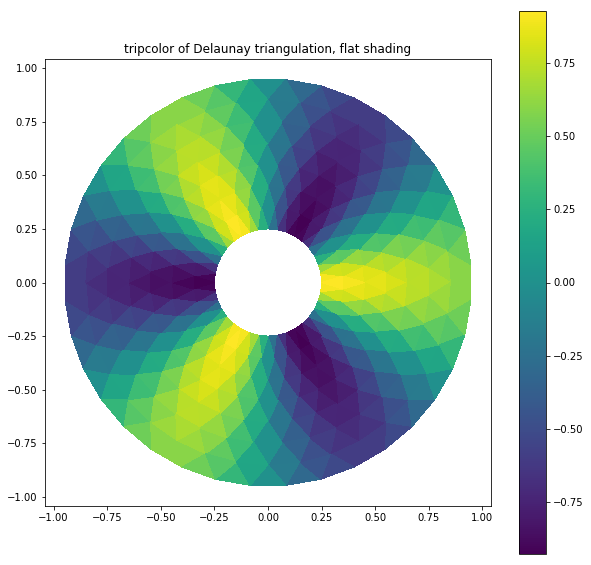

In [17]:
# matplotlib demo from https://matplotlib.org/gallery
import matplotlib.tri as tri
n_angles = 36
n_radii = 8
min_radius = 0.25
radii = np.linspace(min_radius, 0.95, n_radii)
angles = np.linspace(0, 2 * np.pi, n_angles, endpoint=False)
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)
angles[:, 1::2] += np.pi / n_angles
x = (radii * np.cos(angles)).flatten()
y = (radii * np.sin(angles)).flatten()
z = (np.cos(radii) * np.cos(3 * angles)).flatten()
triang = tri.Triangulation(x, y)
triang.set_mask(np.hypot(x[triang.triangles].mean(axis=1), y[triang.triangles].mean(axis=1)) < min_radius)
plt.figure(figsize=(10,10))
plt.gca().set_aspect('equal')
plt.tripcolor(triang, z, shading='flat')
plt.colorbar()
plt.title('tripcolor of Delaunay triangulation, flat shading')
plt.show()

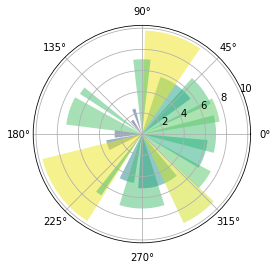

In [19]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)

ax = plt.subplot(111, projection='polar')
bars = ax.bar(theta, radii, width=width, bottom=0.0)

# Use custom colors and opacity
for r, bar in zip(radii, bars):
    bar.set_facecolor(plt.cm.viridis(r / 10.))
    bar.set_alpha(0.5)

plt.show()

In [255]:
# load dataset
iris = sns.load_dataset('iris')

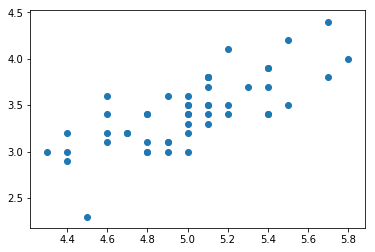

In [256]:
colors = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
plt.scatter(x=iris.loc[iris.species == 'setosa', 'sepal_length'], y=iris.loc[iris.species == 'setosa', 'sepal_width'])

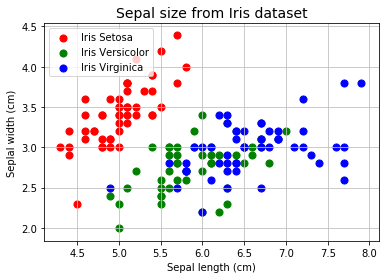

In [257]:
fig = plt.figure()
ax = fig.add_subplot(111)
setosa = ax.scatter(iris.loc[iris.species == 'setosa', 'sepal_length'],
                    y=iris.loc[iris.species == 'setosa', 'sepal_width'],
                    s=50,
                    c='red')
versicolor = ax.scatter(iris.loc[iris.species == 'versicolor', 'sepal_length'],
                        y=iris.loc[iris.species == 'versicolor', 'sepal_width'],
                        s=50,
                        c='green')
virginica = ax.scatter(iris.loc[iris.species == 'virginica', 'sepal_length'],
                       y=iris.loc[iris.species == 'virginica', 'sepal_width'],
                       s=50,
                       c='blue')
ax.set_title('Sepal size from Iris dataset', fontsize=14)
ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Seplal width (cm)')
ax.legend([setosa, versicolor, virginica], ["Iris Setosa", "Iris Versicolor", "Iris Virginica"], loc=2)

ax.grid(True, linestyle='-',color='0.75')

plt.show()

In [258]:
iris.loc[iris.species == 'setosa', 'sepal_length']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

[https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html)

In [183]:
a = widgets.IntSlider(description='a')
b = widgets.IntSlider(description='b')
c = widgets.IntSlider(description='c')
def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a*b*c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

widgets.HBox([widgets.VBox([a, b, c]), out])

[https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html](https://ipywidgets.readthedocs.io/en/latest/examples/Output%20Widget.html)